# Pair Programming Intro Machine Learning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
import datetime
import statsmodels.api as sm
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8) 

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

In [8]:
# este DF extraido de Kaggle muestra las ventas en dólares de una cadena de supermercados estadounidense que vende cafés, tes e infusiones

sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales.csv")
sales.sample(7)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
535,312,Illinois,Central,Major Market,208.0,329.0,567.0,238.0,121.0,78.0,1190.0,230.0,250.0,340.0,590.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
3135,740,Ohio,Central,Major Market,11.0,65.0,118.0,53.0,54.0,20.0,361.0,20.0,60.0,70.0,130.0,6,05/01/10 00:00:00,Espresso,Decaf Espresso,Decaf
3215,773,Illinois,Central,Major Market,112.0,152.0,256.0,104.0,40.0,29.0,871.0,120.0,80.0,140.0,220.0,10,05/01/10 00:00:00,Herbal Tea,Mint,Decaf
2225,585,New York,East,Major Market,303.0,331.0,614.0,245.0,127.0,93.0,1704.0,140.0,180.0,240.0,420.0,9,11/01/11 00:00:00,Herbal Tea,Lemon,Decaf
543,312,Illinois,Central,Major Market,316.0,312.0,611.0,234.0,114.0,77.0,1310.0,260.0,270.0,370.0,640.0,5,01/01/11 00:00:00,Espresso,Caffe Mocha,Regular
1317,435,Utah,West,Small Market,-11.0,61.0,103.0,43.0,64.0,39.0,282.0,10.0,20.0,50.0,70.0,11,05/01/11 00:00:00,Tea,Darjeeling,Regular
2707,702,Nevada,West,Small Market,6.0,35.0,63.0,28.0,29.0,8.0,958.0,20.0,30.0,40.0,70.0,3,03/01/10 00:00:00,Coffee,Decaf Irish Cream,Decaf


url: https://www.kaggle.com/datasets/dsfelix/us-stores-sales 

### Esta es la descripción de nuestras columnas:

- area_code: código de área

- state: estado (EEUU) de la tienda 

- market: región de la tienda (West, Central, East, South)

- market_size: tamaño de la tienda (Small Market, Major Market)

- profit: beneficio en $

- margin: beneficio por cada producto ($)

- sales: valores adquiridos en las ventas ($)

- cogs: coste de los productos vendidos ($)

- total_expenses: gastos totales para conseguir vender el producto ($)

- marketing: gastos de marketing ($)

- inventory: valor de inventario de producto en el momento de la venta ($)

- budget_profit: beneficio esperado ($)

- budget_cogs: presupuesto de coste de productos vendidos ($)

- budget_margin: pres. beneficio + gastos totales o pres ventas - pres. cogs ($)

- budget_sales: presupuesto de ventas ($)

- productid: id de producto

- date: fecha de venta (dd/mm/aaaa)

- product_type: categoría de producto (Espresso, Coffe, Herbal, Tea)

- product: descripción del producto

- type: tipo (Regular, Decaf)

### Partimos de la base de que nuestra variable respuesta va a ser "Profit" (beneficio).

# Objetivos

Los objetivos de hoy son:

 - Buscar un conjunto de datos a analizar:

Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

Esto se hace para que comprendais mejor los datos con los que estais trabajando.

- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

Happy coding 📊📈📉

Empezamos a conocer nuestros datos:

In [9]:
# cambiamos los nombres de las columnas para que nos sea más cómodo trabajar con ellas

nuevas_columnas = {col:col.lower().replace(' ','_') for col in sales.columns}
sales.rename(columns=nuevas_columnas, inplace = True)

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_code       4248 non-null   int64  
 1   state           4248 non-null   object 
 2   market          4248 non-null   object 
 3   market_size     4248 non-null   object 
 4   profit          4248 non-null   float64
 5   margin          4248 non-null   float64
 6   sales           4248 non-null   float64
 7   cogs            4248 non-null   float64
 8   total_expenses  4248 non-null   float64
 9   marketing       4248 non-null   float64
 10  inventory       4248 non-null   float64
 11  budget_profit   4248 non-null   float64
 12  budget_cogs     4248 non-null   float64
 13  budget_margin   4248 non-null   float64
 14  budget_sales    4248 non-null   float64
 15  productid       4248 non-null   int64  
 16  date            4248 non-null   object 
 17  product_type    4248 non-null   o

In [11]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
area_code,4248.0,582.278013,221.140310,203.0,417.00,573.0,772.0,985.0
profit,4248.0,61.097693,101.708546,-638.0,17.00,40.0,92.0,778.0
margin,4248.0,104.293315,94.342522,-302.0,52.75,76.0,132.0,613.0
sales,4248.0,192.987524,151.133127,17.0,100.00,138.0,230.0,912.0
cogs,4248.0,84.433145,67.249769,0.0,43.00,60.0,100.0,364.0
total_expenses,4248.0,54.063559,32.352598,10.0,33.00,46.0,65.0,190.0
marketing,4248.0,31.185028,27.023264,0.0,13.00,22.0,39.0,156.0
inventory,4248.0,749.381356,661.031896,-3534.0,432.00,619.0,910.5,8252.0
budget_profit,4248.0,60.913371,79.546123,-320.0,20.00,40.0,80.0,560.0
budget_cogs,4248.0,74.830508,66.238145,0.0,30.00,50.0,90.0,450.0


In [12]:
sales.isnull().sum()

area_code         0
state             0
market            0
market_size       0
profit            0
margin            0
sales             0
cogs              0
total_expenses    0
marketing         0
inventory         0
budget_profit     0
budget_cogs       0
budget_margin     0
budget_sales      0
productid         0
date              0
product_type      0
product           0
type              0
dtype: int64

In [13]:
sales.duplicated().sum()

0

In [14]:
sales["market_size"].unique()

array(['Small Market', 'Major Market'], dtype=object)

In [15]:
sales["market"].unique()

array(['East', 'West', 'South', 'Central'], dtype=object)

In [16]:
sales["state"].unique()

array(['Connecticut', 'Washington', 'California', 'Texas', 'New York',
       'Ohio', 'Illinois', 'Louisiana', 'Florida', 'Wisconsin',
       'Colorado', 'Missouri', 'Iowa', 'Massachusetts', 'Oklahoma',
       'Utah', 'Oregon', 'New Mexico', 'New Hampshire', 'Nevada'],
      dtype=object)

In [17]:
sales["product_type"].unique()

array(['Coffee', 'Tea', 'Espresso', 'Herbal Tea'], dtype=object)

In [18]:
sales["product"].unique()

array(['Columbian', 'Green Tea', 'Caffe Mocha', 'Decaf Espresso', 'Lemon',
       'Mint', 'Darjeeling', 'Decaf Irish Cream', 'Chamomile',
       'Earl Grey', 'Caffe Latte', 'Amaretto', 'Regular Espresso'],
      dtype=object)

In [19]:
sales["date"].unique()

array(['04/01/10 00:00:00', '07/01/10 00:00:00', '11/01/10 00:00:00',
       '12/01/10 00:00:00', '07/01/11 00:00:00', '08/01/11 00:00:00',
       '09/01/11 00:00:00', '10/01/11 00:00:00', '11/01/11 00:00:00',
       '06/01/10 00:00:00', '10/01/10 00:00:00', '01/01/11 00:00:00',
       '02/01/11 00:00:00', '03/01/11 00:00:00', '04/01/11 00:00:00',
       '05/01/11 00:00:00', '12/01/11 00:00:00', '02/01/10 00:00:00',
       '05/01/10 00:00:00', '08/01/10 00:00:00', '03/01/10 00:00:00',
       '09/01/10 00:00:00', '06/01/11 00:00:00', '01/01/10 00:00:00'],
      dtype=object)

In [20]:
# modificamos el tipo de dato de la columna fecha

sales["date"] = sales["date"].astype("datetime64")

In [21]:
sales["date"].dtypes

dtype('<M8[ns]')

In [22]:
sales_num = sales.select_dtypes(include=np.number)

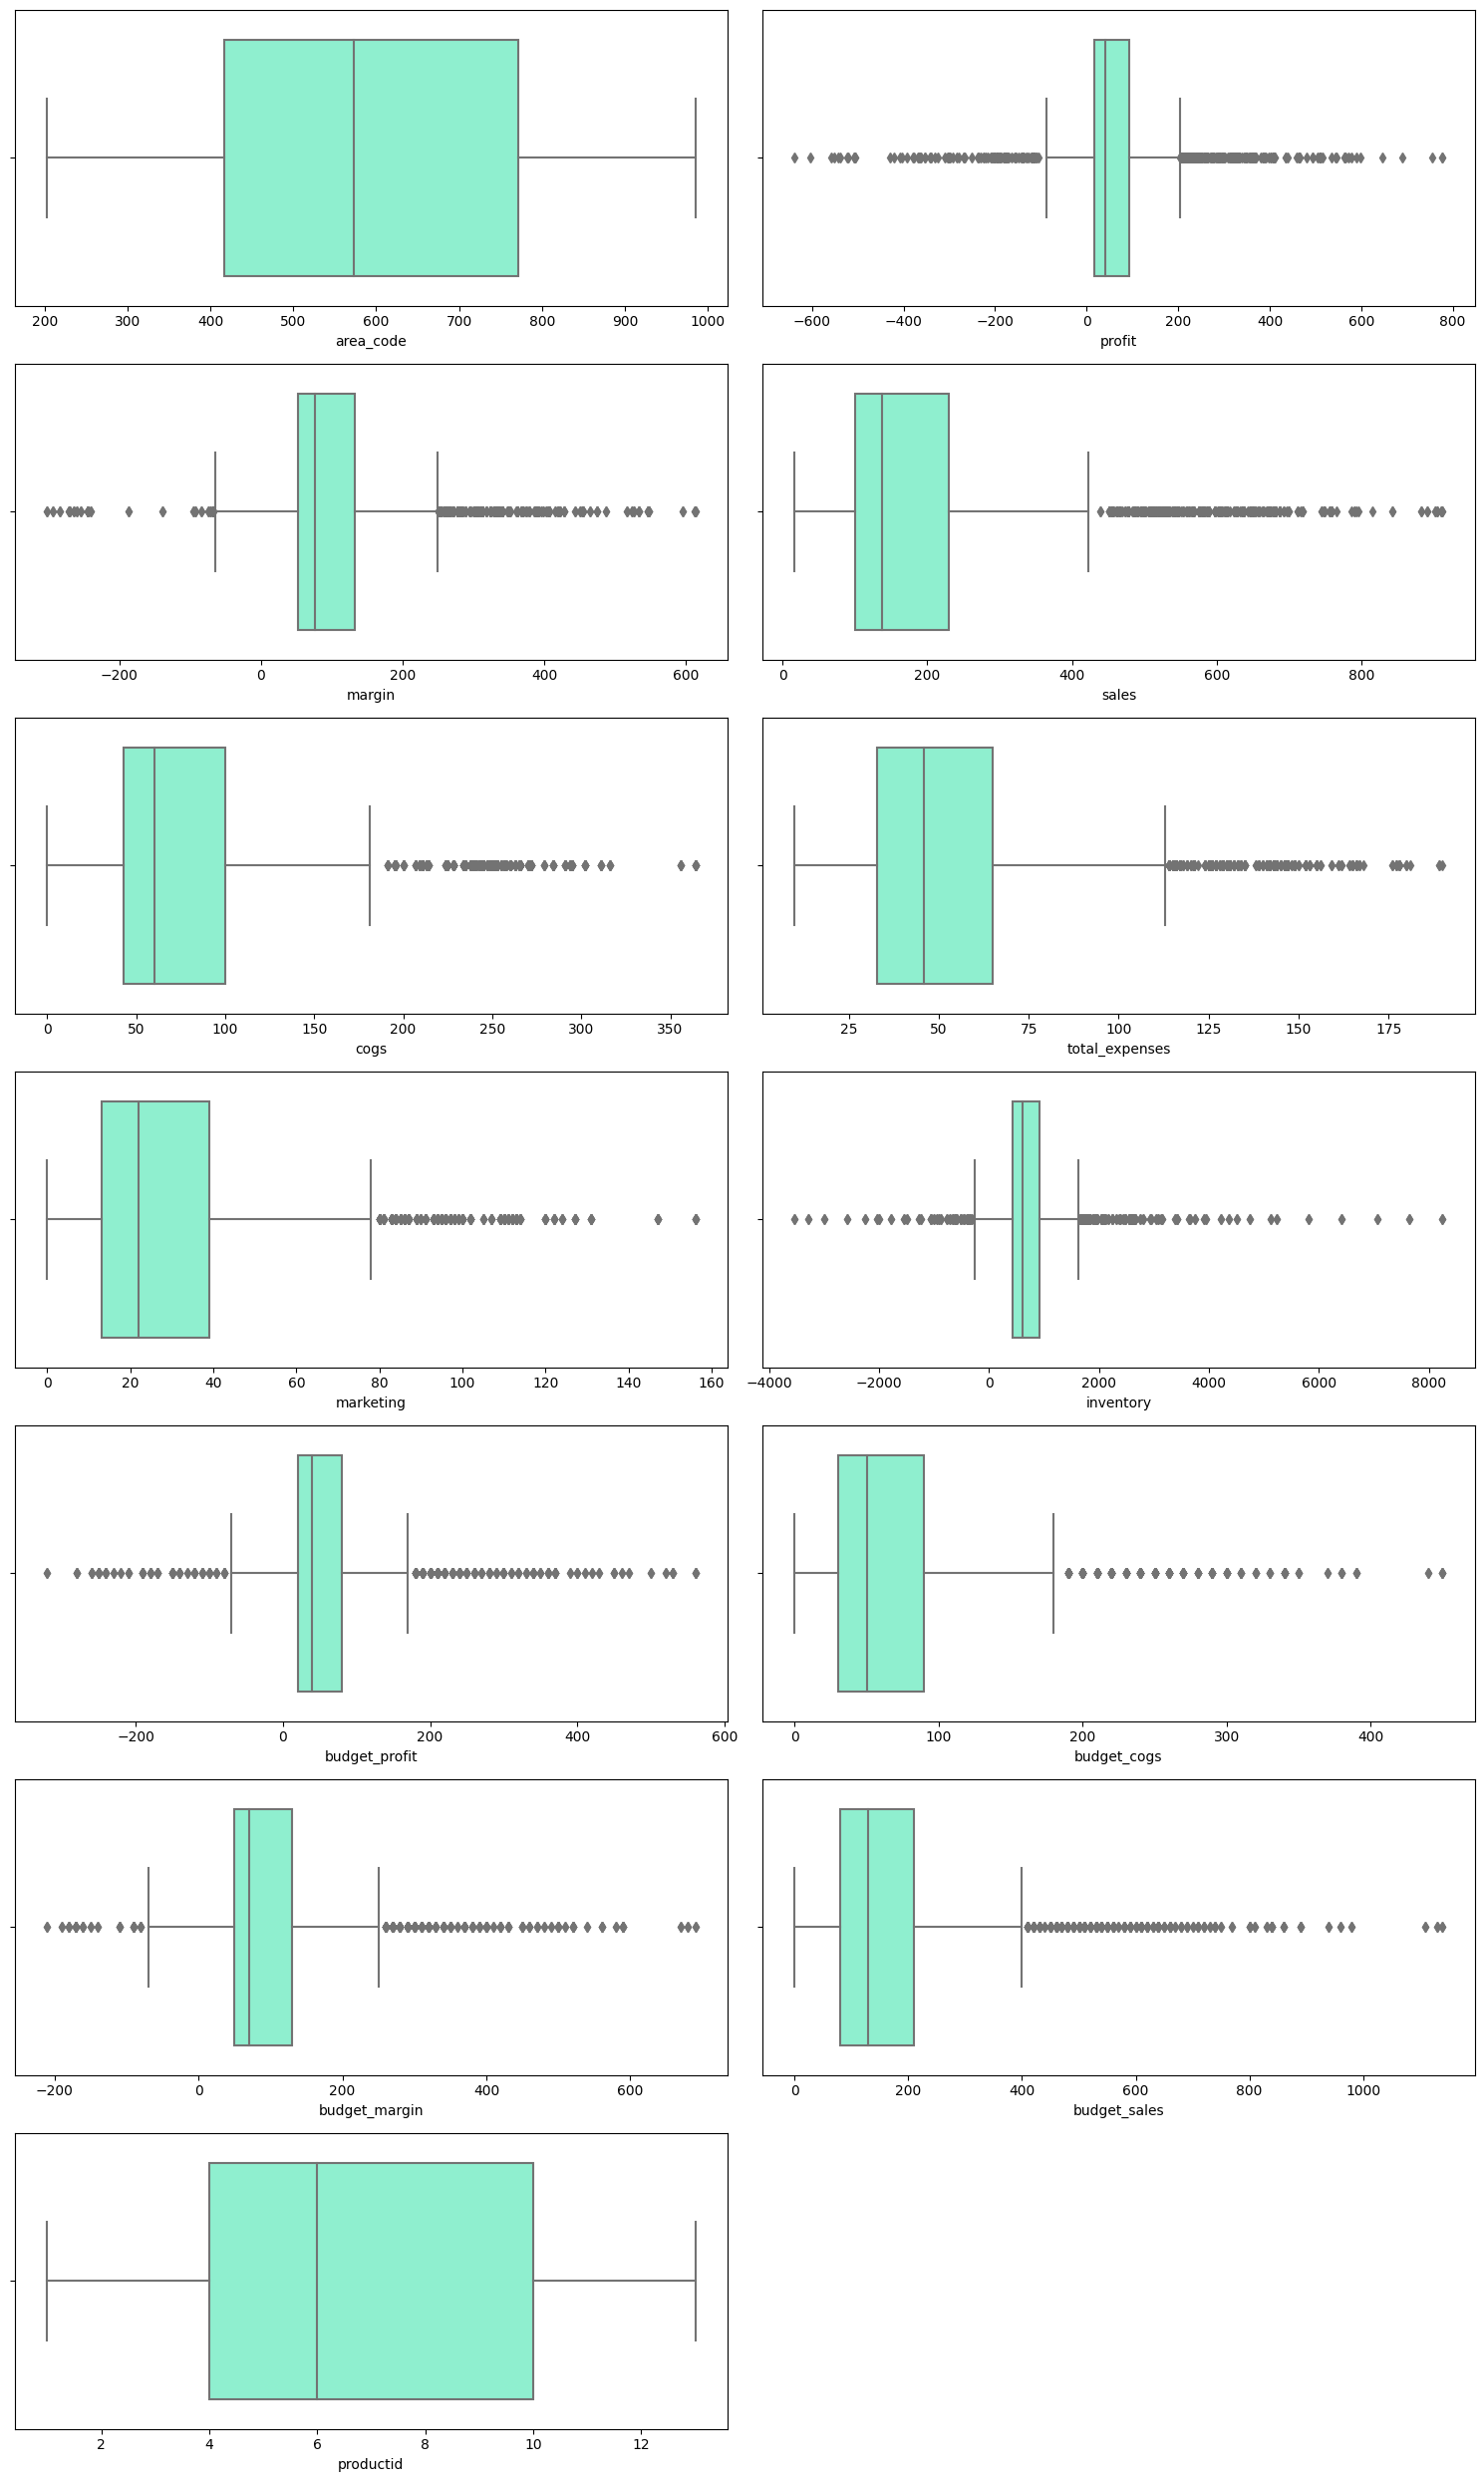

In [23]:
# identificamos outliers

fig, axes = plt.subplots(7, 2, figsize=(15,25))

axes = axes.flat

for i, col in enumerate(sales_num.columns):
    sns.boxplot(x = sales_num[col], data = sales_num, ax=axes[i], color = "aquamarine")

fig.delaxes(axes[-1])    
plt.tight_layout()
plt.show();

Examinamos la columna "Profit" para verla más en detalle, ya que es nuestra variable respuesta.

In [24]:
sales.head(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular


In [25]:
sales.profit.mean()

61.097693032015066

In [26]:
sales.profit.median()

40.0

In [27]:
sales.profit.mode()

0    47.0
Name: profit, dtype: float64

Top-ten beneficio por producto, estado y tamaño 

In [28]:
top_ten_producto = sales.groupby('product')['profit'].agg(top_ten_producto=('sum'))
top_ten_producto =top_ten_producto.reset_index()
top_ten_producto.sort_values(by = 'top_ten_producto',ascending = False,inplace =True)
top_ten_producto

,product,top_ten_producto
4,Columbian,55804.0
10,Lemon,29869.0
6,Decaf Espresso,29502.0
5,Darjeeling,29053.0
3,Chamomile,27231.0
8,Earl Grey,24164.0
2,Caffe Mocha,17678.0
7,Decaf Irish Cream,13989.0
1,Caffe Latte,11375.0
12,Regular Espresso,10065.0


In [29]:
top_ten_estado = sales.groupby('state')['profit'].agg(top_ten_estado=('sum'))
top_ten_estado =top_ten_estado.reset_index()
top_ten_estado.sort_values(by = 'top_ten_estado',ascending = False,inplace =True)
top_ten_estado

,state,top_ten_estado
0,California,31785.0
4,Illinois,30821.0
5,Iowa,22212.0
12,New York,20096.0
1,Colorado,17743.0
7,Massachusetts,16442.0
16,Texas,15766.0
15,Oregon,12439.0
3,Florida,12310.0
18,Washington,11405.0


In [30]:
profit_market_size = sales.groupby('market_size')['profit'].agg(profit_market_size=('sum'))
profit_market_size =profit_market_size.reset_index()
profit_market_size.sort_values(by = 'profit_market_size',ascending = False,inplace =True)
profit_market_size

,market_size,profit_market_size
0,Major Market,155736.0
1,Small Market,103807.0


Creamos la columna mes para conocer los meses con más y menos beneficios.

In [31]:
import datetime

In [32]:
sales['mes']= sales['date'].dt.month
sales.head(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,4
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,7


In [33]:
profit_mes = sales.groupby('mes')['profit'].agg(profit_mes=('sum'))
profit_mes =profit_mes.reset_index()
profit_mes.sort_values(by = 'profit_mes',ascending = False,inplace =True)
profit_mes

,mes,profit_mes
6,7,23576.0
5,6,22789.0
7,8,22771.0
11,12,21900.0
9,10,21552.0
3,4,21533.0
4,5,21295.0
8,9,21135.0
10,11,20859.0
1,2,20788.0


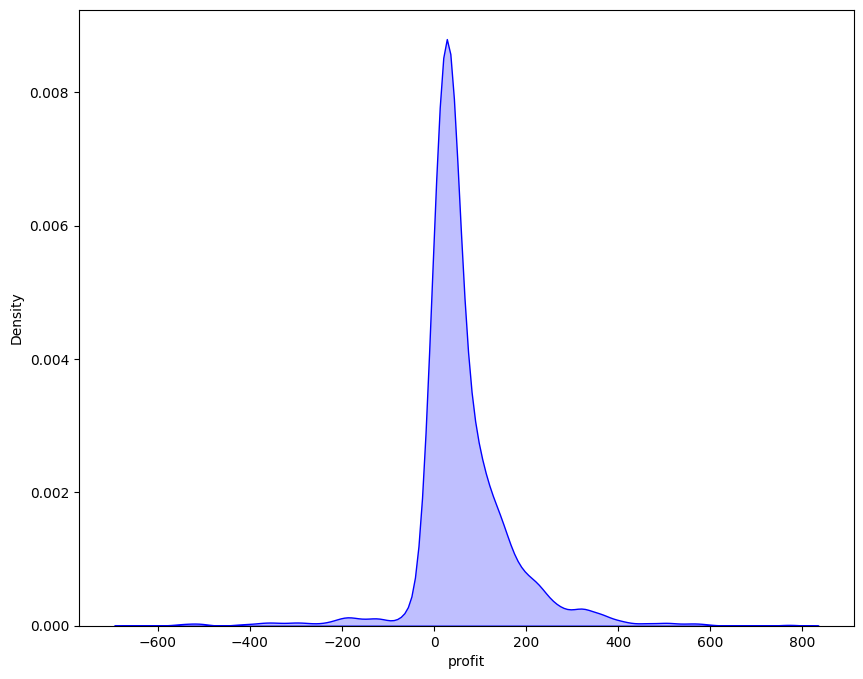

In [34]:
# vamos a ver como está distribuida nuestra variable respuesta

sns.distplot(
    sales["profit"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

Podemos observar que nuestros datos presentan más beneficios que pérdidas, pero a su vez el beneficio es muy pequeño (mucha concentración de datos cercana a 0).

Optamos por sustituir los valores de los outliers por la mediana para trabajar con valores un poco más pequeños, pero sin alterar demasiado los datos originales.

In [35]:
# identificamos los outliers 

def outliers (lista_col, df):

    dicc_ind = {}

    for col in lista_col:

        Q1 = np.nanpercentile(sales_num[col], 25)
        Q3 = np.nanpercentile(sales_num[col], 75)

        IQR = Q3-Q1

        outlier_step = 1.5*IQR

        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]

        if outliers_data.shape[0] > 0:
            
            dicc_ind[col] = (list(outliers_data.index))

    return dicc_ind

In [36]:
# creamos una lista con nuestras columnas numéricas

lista_col_num = list(sales_num.columns)
lista_col_num

['area_code',
 'profit',
 'margin',
 'sales',
 'cogs',
 'total_expenses',
 'marketing',
 'inventory',
 'budget_profit',
 'budget_cogs',
 'budget_margin',
 'budget_sales',
 'productid']

In [37]:
ind = outliers(lista_col_num, sales)

In [38]:
ind.keys()

dict_keys(['profit', 'margin', 'sales', 'cogs', 'total_expenses', 'marketing', 'inventory', 'budget_profit', 'budget_cogs', 'budget_margin', 'budget_sales'])

In [39]:
# sustituimos los outliers por la mediana

for k, v in ind.items():
    median = (sales[k]).median()
    for i in v:
        sales.loc[i,k] = median

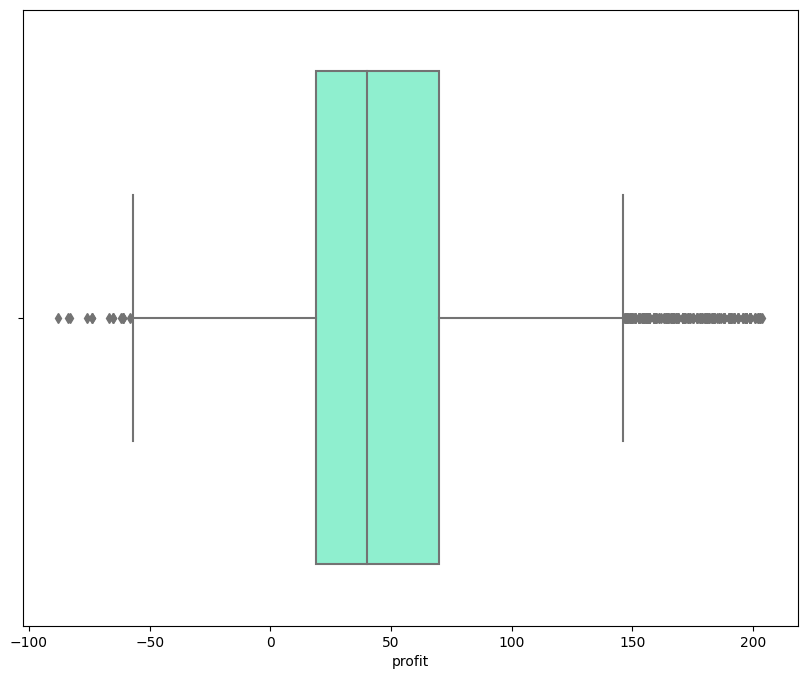

In [40]:
# comprobamos visualmente que los outliers para la columna "Profit" se han modificado por la mediana

sns.boxplot(x = sales["profit"], data = sales, color = "aquamarine")

plt.show();

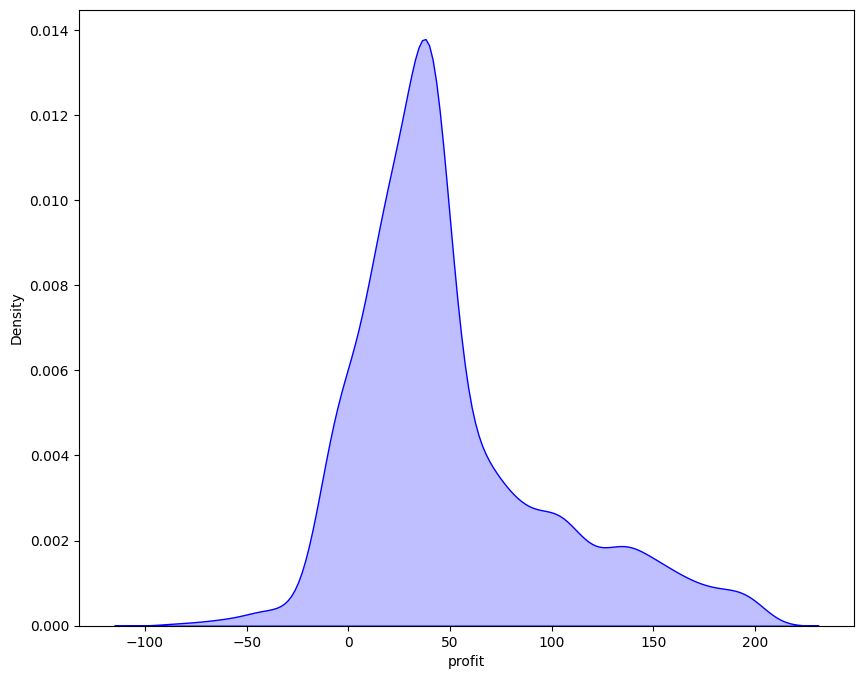

In [41]:

sns.distplot(
    sales["profit"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

Averiguamos los valores exactos de beneficio más altos y más bajos.

In [42]:
for col in sales_num:
    print(f"El valor máximo de la columna {col} es {sales_num[col].max()} y el mínimo es {sales_num[col].min()}")

El valor máximo de la columna area_code es 985 y el mínimo es 203
El valor máximo de la columna profit es 778.0 y el mínimo es -638.0
El valor máximo de la columna margin es 613.0 y el mínimo es -302.0
El valor máximo de la columna sales es 912.0 y el mínimo es 17.0
El valor máximo de la columna cogs es 364.0 y el mínimo es 0.0
El valor máximo de la columna total_expenses es 190.0 y el mínimo es 10.0
El valor máximo de la columna marketing es 156.0 y el mínimo es 0.0
El valor máximo de la columna inventory es 8252.0 y el mínimo es -3534.0
El valor máximo de la columna budget_profit es 560.0 y el mínimo es -320.0
El valor máximo de la columna budget_cogs es 450.0 y el mínimo es 0.0
El valor máximo de la columna budget_margin es 690.0 y el mínimo es -210.0
El valor máximo de la columna budget_sales es 1140.0 y el mínimo es 0.0
El valor máximo de la columna productid es 13 y el mínimo es 1


In [43]:
sales[(sales["profit"] == 204.0)]

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes
2545,631,New York,East,Major Market,204.0,76.0,138.0,60.0,46.0,22.0,...,140.0,180.0,240.0,130.0,9,2010-11-01,Herbal Tea,Lemon,Decaf,11


In [44]:
sales[(sales["profit"] == -88.0)]

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes
3952,951,California,West,Major Market,-88.0,-25.0,102.0,127.0,63.0,40.0,...,40.0,150.0,-30.0,120.0,1,2010-12-01,Coffee,Amaretto,Regular,12


Como podemos observar, el producto con mayor beneficio es el té de limón sin cafeína vendido en un mercado de tamaño grande en la zona este de Nueva York.

Por el contrario, vemos que el producto que presenta menos beneficio es el café amaretto vendido en un supermercado de tamaño grande en la zona oeste de California.

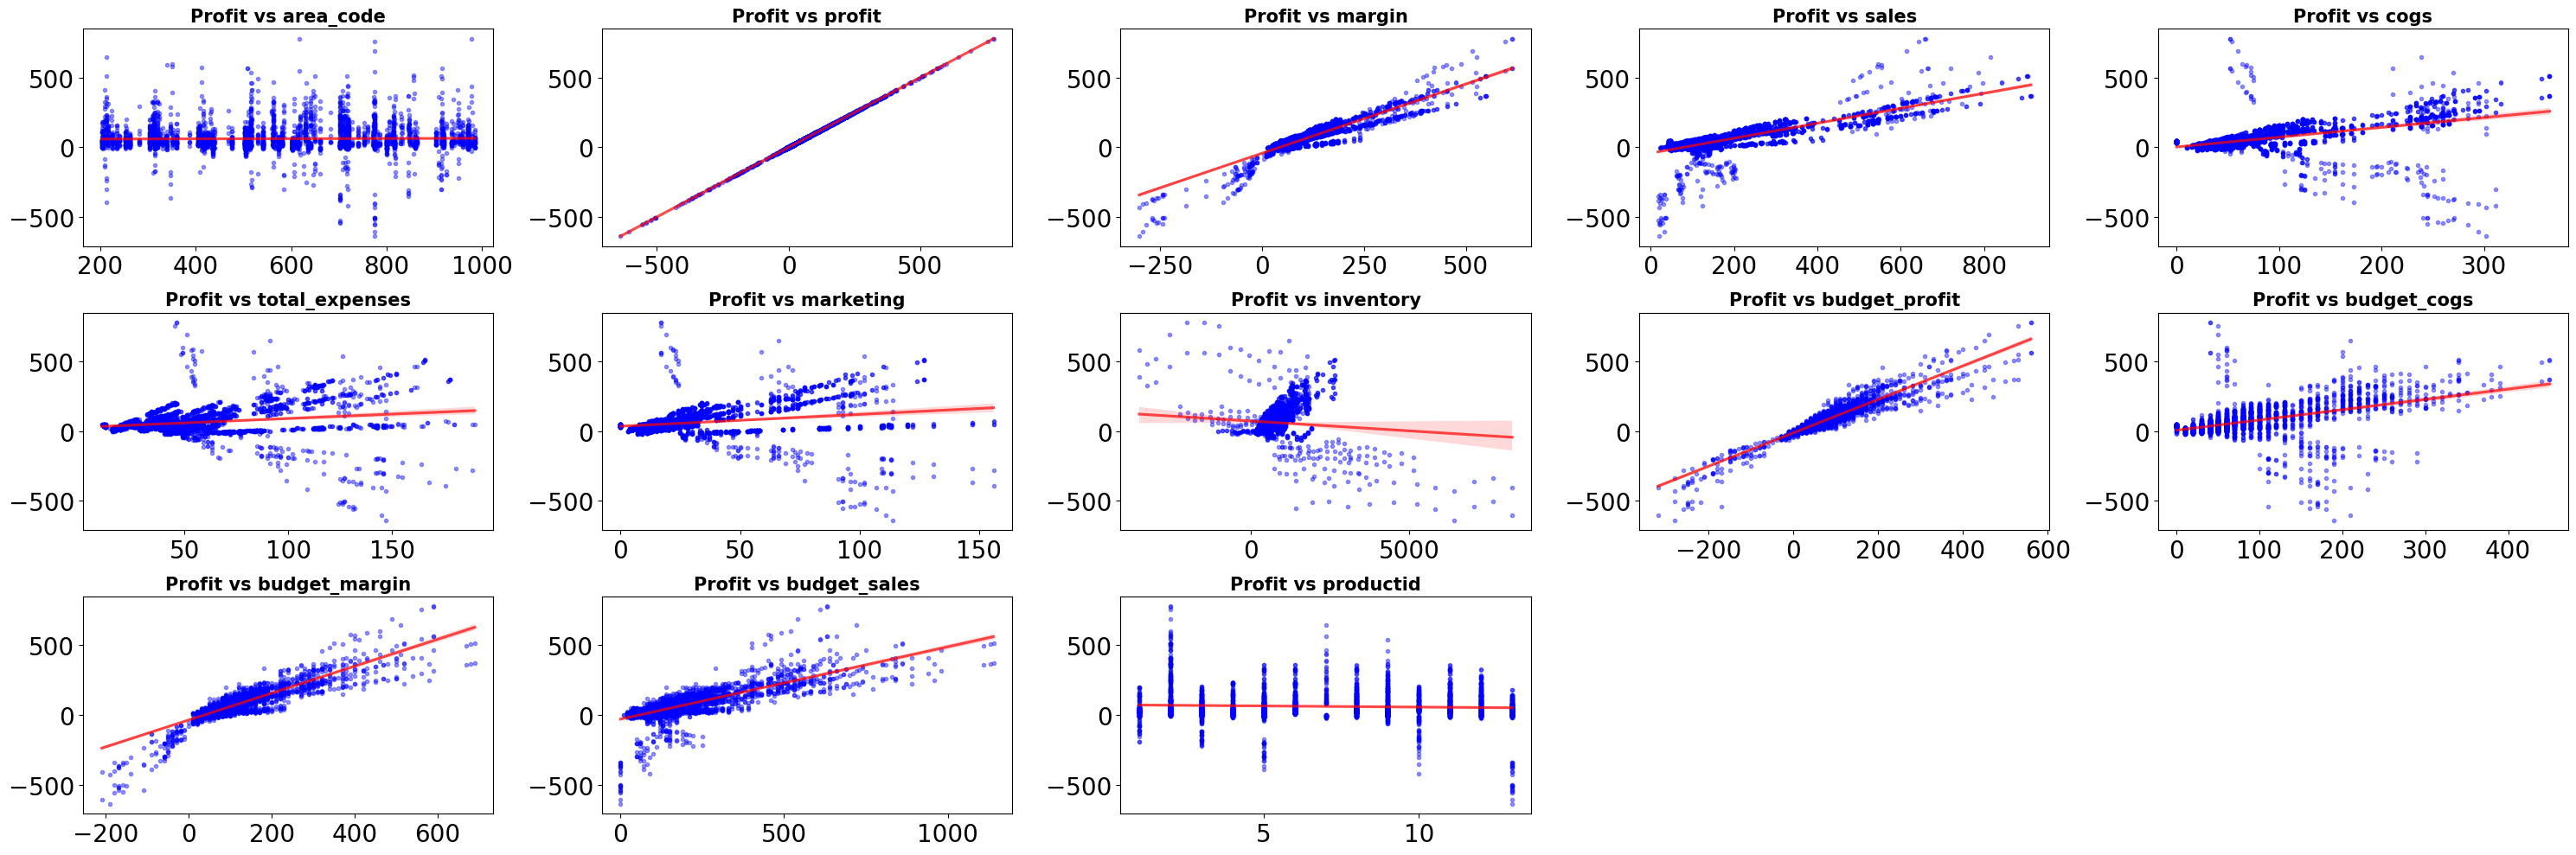

In [45]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# Queremos ver qué variables están más relacionadas con profit
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30, 10))


axes = axes.flat

columnas_numeric = sales_num.columns

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = sales_num[colum], 
        y = sales_num["profit"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Profit vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

In [46]:
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (100, 80))
axes = axes.flat
for i, colum in enumerate(sales_num.columns): 
    sns.histplot(
        data = sales_num[colum],
        kde = True,
        color = "green", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.5,
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 40, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

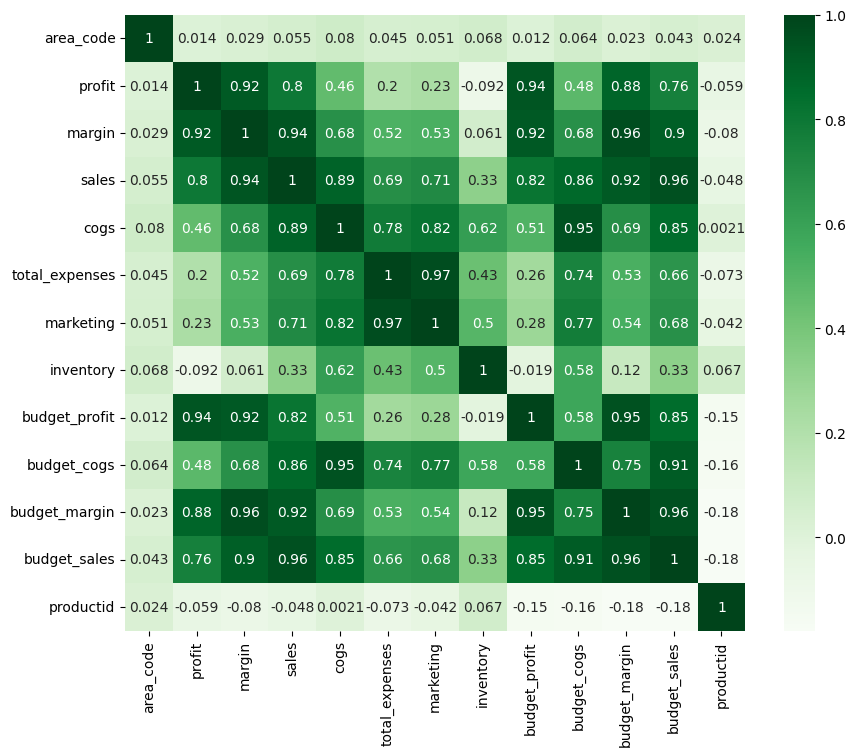

In [47]:
# hacemos un heatmap para observar la correlación entre todas las variables numéricas

sns.heatmap(sales_num.corr(), 
           cmap = "Greens", 
           annot = True);

Interpretaremos los resultados de la correlación en ejercicios posteriores.

In [48]:
sales.to_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales2.csv")